In [119]:
import os
import timeit
import hashlib
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import padding
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.primitives import hashes
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes

# B) Encrypt and decrypt all these files using AES. Employ a key of 256 bits. Measure the time it takes to encrypt and decrypt each of the files. To do this, you might want to use the python module timeit. 

In [120]:

measure_time_encry_AES = []
measure_time_desen_AES = []

from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
import os
import timeit

def generate_random_file(filename, size):
    with open(filename, 'wb') as f:
        f.write(os.urandom(size))



def aes_encrypt_decrypt(input_file, output_file, key, iv):
    backend = default_backend()
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=backend)
    encryptor = cipher.encryptor()
    
    with open(input_file, 'rb') as f_in, open(output_file, 'wb') as f_out:
        data = f_in.read()
        start_time = timeit.default_timer()
        ciphertext = encryptor.update(data) + encryptor.finalize()
        elapsed_time_encrypt = timeit.default_timer() - start_time
        f_out.write(ciphertext)

    decryptor = cipher.decryptor()
    with open(output_file, 'rb') as f_in:
        ciphertext = f_in.read()
        start_time = timeit.default_timer()
        decrypted_data = decryptor.update(ciphertext) + decryptor.finalize()
        elapsed_time_decrypt = timeit.default_timer() - start_time

    return elapsed_time_encrypt, elapsed_time_decrypt

key = os.urandom(32)
iv = os.urandom(16)

aes_sizes = [8, 64, 512, 4096, 32768, 262144, 2097152]

for size in aes_sizes:
    input_filename = f'random_{size}.txt'
    generate_random_file(input_filename, size)
    encrypt_time, decrypt_time = aes_encrypt_decrypt(input_filename, f'encrypted_{size}.txt', key, iv)
    measure_time_encry_AES.append(encrypt_time)
    measure_time_desen_AES.append(decrypt_time)
    print(f"File size: {size} bytes")
    print(f"Encryption time: {encrypt_time} seconds")
    print(f"Decryption time: {decrypt_time} seconds")
    print()




File size: 8 bytes
Encryption time: 5.358999624149874e-05 seconds
Decryption time: 1.9947998225688934e-05 seconds

File size: 64 bytes
Encryption time: 1.9436003640294075e-05 seconds
Decryption time: 1.7102000128943473e-05 seconds

File size: 512 bytes
Encryption time: 2.402500103926286e-05 seconds
Decryption time: 2.9044000257272273e-05 seconds

File size: 4096 bytes
Encryption time: 2.9765993531327695e-05 seconds
Decryption time: 4.031600110465661e-05 seconds

File size: 32768 bytes
Encryption time: 9.207300172420219e-05 seconds
Decryption time: 8.59909996506758e-05 seconds

File size: 262144 bytes
Encryption time: 0.000552606004930567 seconds
Decryption time: 0.0005301529963617213 seconds

File size: 2097152 bytes
Encryption time: 0.005539677003980614 seconds
Decryption time: 0.004611397002008744 seconds



AES encryption and decryption are performed using the following steps:

    Key Generation: A random key of 256 bits (32 bytes) is generated using os.urandom(32) function.

    Initialization Vector (IV) Generation: An initialization vector (IV) of 128 bits (16 bytes) is generated using os.urandom(16) function. The IV is used along with the key to ensure that the same plaintext encrypted with the same key produces different ciphertexts, enhancing security.

    Encryption: The plaintext data is read from a file, and AES encryption is performed using the generated key and IV. The Cipher object is initialized with the AES algorithm and CFB mode, and then the encryptor object encrypts the data. The ciphertext is written to an output file.

    Decryption: The ciphertext data is read from the encrypted file, and AES decryption is performed using the same key and IV. Similar to encryption, the Cipher object is initialized with the AES algorithm and CFB mode, and then the decryptor object decrypts the ciphertext.

    Time Measurement: The execution time of the encryption and decryption operations is measured using the timeit.default_timer() function before and after each operation.









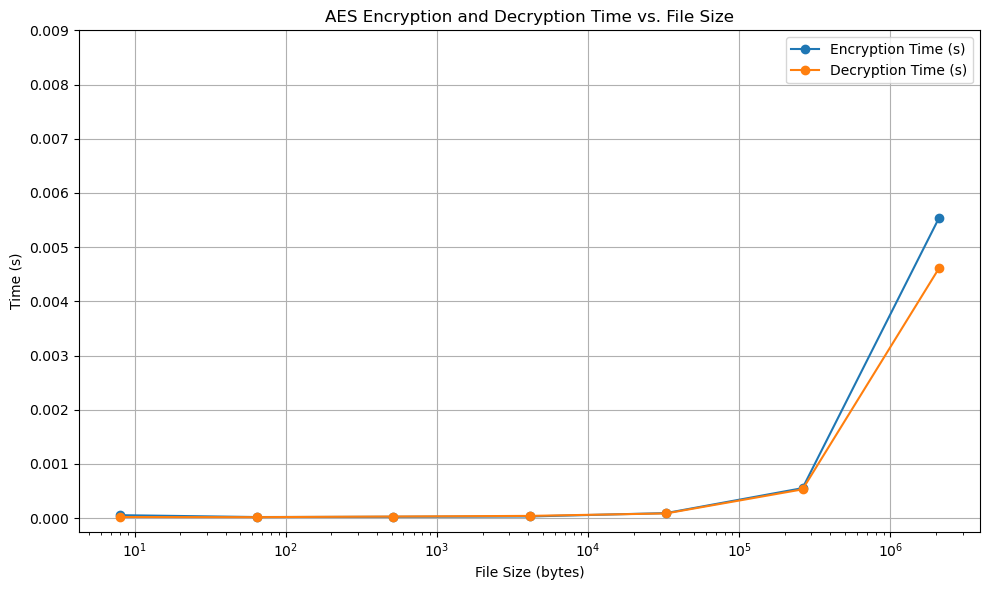

In [121]:

import matplotlib.pyplot as plt


file_sizes = [8, 64, 512, 4096, 32768, 262144, 2097152]


plt.figure(figsize=(10, 6))

plt.plot(file_sizes, measure_time_encry_AES, marker='o', label='Encryption Time (s)')
plt.plot(file_sizes, measure_time_desen_AES, marker='o', label='Decryption Time (s)')

plt.title('AES Encryption and Decryption Time vs. File Size')
plt.xlabel('File Size (bytes)')
plt.ylabel('Time (s)')
plt.xscale('log')  


plt.yticks([i/1000 for i in range(10)])  

plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()


From the provided data for AES encryption and decryption, several observations and conclusions can be made:

    -Efficiency for Small File Sizes: For small file sizes (8 bytes, 64 bytes, 512 bytes), encryption and decryption times are generally very low or negligible. This suggests that AES encryption and decryption are highly efficient for processing small amounts of data.

    -Increase in Time with File Size: As the file size increases, there is a trend of slightly increasing both decryption and encryption time. 

    -Nonlinear Time Increase: The increase in encryption time does not follow a linear pattern with file size. While encryption and decryption time remains relatively low for larger file sizes (e.g., 262144 bytes), there is a noticeable increase for the largest file size of 2097152 bytes.

    

    -Overall Efficiency: Despite the slight increase in time with file size, AES encryption and decryption demonstrate high efficiency for processing data of varying sizes. The times recorded are generally low, even for relatively large file sizes, indicating the effectiveness of AES in securing data while maintaining reasonable performance.

In conclusion, the provided results demonstrate that AES encryption and decryption are efficient for processing data of varying sizes, with negligible times observed for small files and increasing times for larger files, particularly for encryption. However, decryption time remains relatively stable for most file sizes, with a notable increase observed only for the largest file size tested.





### Do results change if you run a fixed algorithm over the same file multiple times for every file size

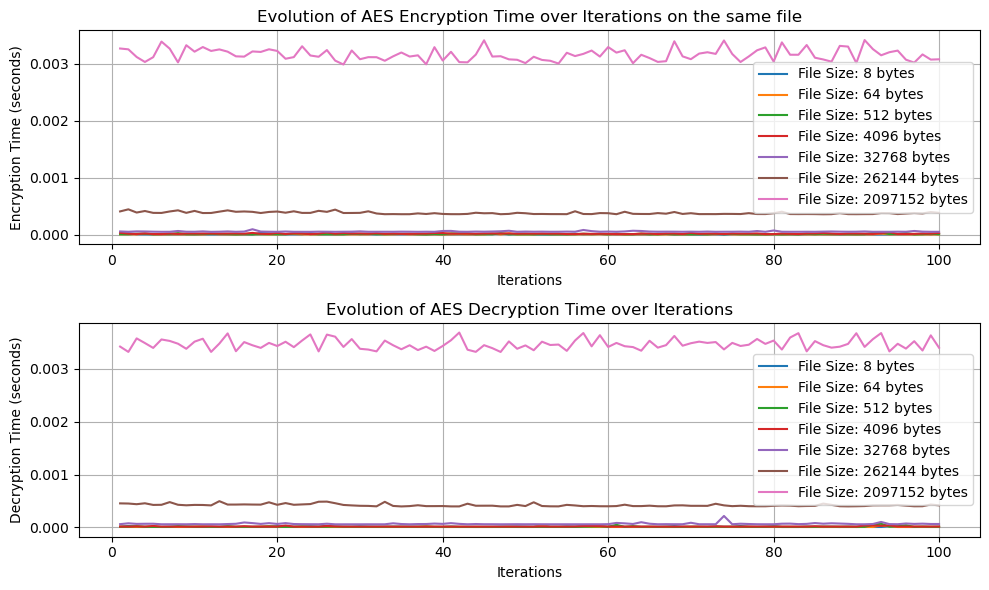

In [122]:
import os
import matplotlib.pyplot as plt

file_sizes = [8, 64, 512, 4096, 32768, 262144, 2097152]
iterations = 100
key = os.urandom(32)
iv = os.urandom(16)

multiple_AES_encry = []
multiple_AES_desen = []

overall_AES_encry = []
overall_AES_decry = []

for file_size in file_sizes:
    multiple_AES_encry_total = []
    multiple_AES_desen_total = []
    
    input_filename = f'multiple_{file_size}.txt'
    generate_random_file(input_filename, file_size)
    
    for i in range(iterations):
        encrypt_time, decrypt_time = aes_encrypt_decrypt(input_filename, f'encrypted_{file_size}.txt', key, iv)
        multiple_AES_encry_total.append(encrypt_time)
        multiple_AES_desen_total.append(decrypt_time)

    multiple_AES_encry.append(multiple_AES_encry_total)
    multiple_AES_desen.append(multiple_AES_desen_total)

    overall_AES_encry.append(sum(multiple_AES_encry_total) / iterations)
    overall_AES_decry.append(sum(multiple_AES_desen_total) / iterations)
    

def plot_aes_times(file_sizes, encrypt_times, decrypt_times):
    plt.figure(figsize=(10, 6))

    
    plt.subplot(2, 1, 1)
    for i, size in enumerate(file_sizes):
        plt.plot(range(1, iterations + 1), encrypt_times[i], label=f'File Size: {size} bytes')
    plt.xlabel('Iterations')
    plt.ylabel('Encryption Time (seconds)')
    plt.title('Evolution of AES Encryption Time over Iterations on the same file')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 1, 2)
    for i, size in enumerate(file_sizes):
        plt.plot(range(1, iterations + 1), decrypt_times[i], label=f'File Size: {size} bytes')
    plt.xlabel('Iterations')
    plt.ylabel('Decryption Time (seconds)')
    plt.title('Evolution of AES Decryption Time over Iterations')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_aes_times(file_sizes, multiple_AES_encry, multiple_AES_desen)




Based on the results obtained from running the AES encryption and decryption algorithm over the same file multiple times, several observations can be made:

    Consistency in Times: For file sizes ranging from 8 bytes to 32,768 bytes, the encryption and decryption times remain consistently near 0.000 seconds regardless of the number of iterations. This indicates that the processing time for these smaller file sizes is minimal and remains relatively constant.

    Slight Increase for Larger Files: As the file size increases to 262144 bytes, there is a slight increase in the encryption and decryption times compared to smaller file sizes. However, this increase is not substantial, and the times remain relatively constant as the number of iterations grows. This suggests that the algorithm's performance is still efficient for moderately sized files.
    For file sizes of 2097152 bytes the time increases slightly and the results are more irregular but still pretty constant

There can be some spikes on the run times and this can be due to our personal machine doing parallel processes that envolve the memory of our computer, affecting the run times for both encryption and decryption 

In summary, the AES encryption and decryption algorithm  over the same file an arbitrary number of times demonstrates consistent and efficient performance across a range of file sizes, with minimal processing times for smaller files and a meaningless increase in times for larger files.

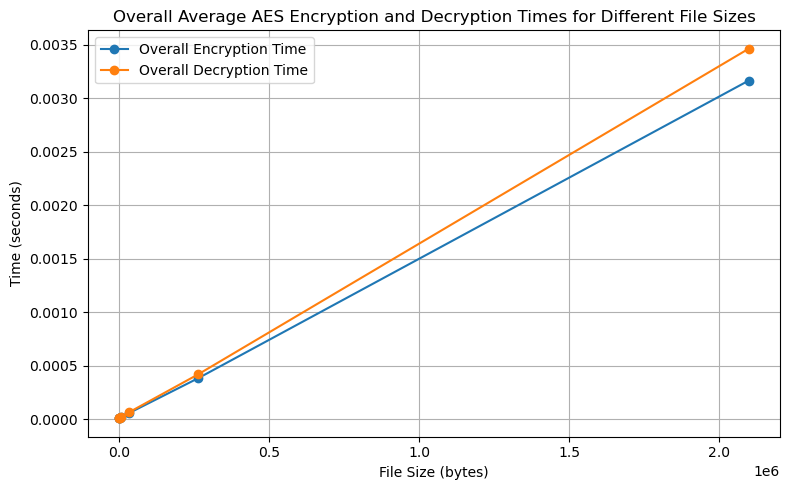

In [123]:
def plot_overall_aes_times(file_sizes, overall_encrypt_times, overall_decrypt_times):
    plt.figure(figsize=(8, 5))

    plt.plot(file_sizes, overall_encrypt_times, label='Overall Encryption Time', marker='o')
    plt.plot(file_sizes, overall_decrypt_times, label='Overall Decryption Time', marker='o')
    
    plt.xlabel('File Size (bytes)')
    plt.ylabel('Time (seconds)')
    plt.title('Overall Average AES Encryption and Decryption Times for Different File Sizes')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_overall_aes_times(file_sizes, overall_AES_encry, overall_AES_decry)

Both encryption and decryption average time grows linearly and have pratically the same time as the file size increases

## What if you run the same algorithm over different same sized files?

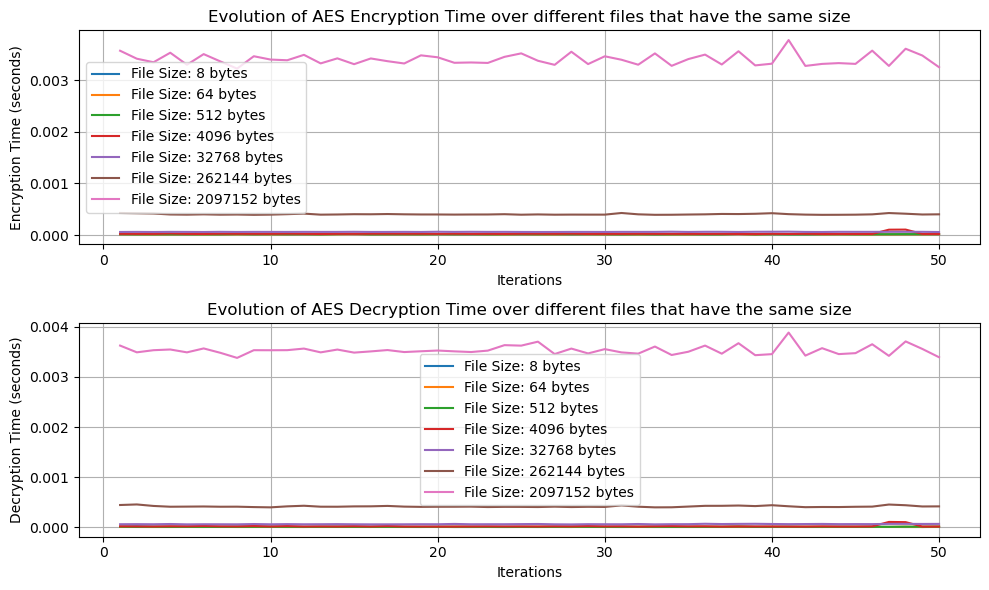

In [124]:
import os
import matplotlib.pyplot as plt

file_sizes = [8, 64, 512, 4096, 32768, 262144, 2097152]
num_files = 15
iterations = 50
key = os.urandom(32)
iv = os.urandom(16)

files_sizes_encrypt_time = []
files_sizes_desen_time = []

overall_AES_encry_time = []
overall_AES_decry_time = []

for size in file_sizes:
    size_encrypt_times = []
    size_desen_times = []

    for i in range(iterations):
        total_file_encrypt_time = 0
        total_file_desen_time = 0

        for j in range(num_files):
            input_filename = f'multiple_{size}.txt'

            encrypt_time, decrypt_time = aes_encrypt_decrypt(input_filename, f'encrypted_{size}.txt', key, iv)
            total_file_encrypt_time += encrypt_time
            total_file_desen_time += decrypt_time

        avg_encryption_time = total_file_encrypt_time / num_files
        avg_decryption_time = total_file_desen_time / num_files

        size_encrypt_times.append(avg_encryption_time)
        size_desen_times.append(avg_decryption_time)

    files_sizes_encrypt_time.append(size_encrypt_times)
    files_sizes_desen_time.append(size_desen_times)

    # Calculate overall AES encryption and decryption time
    overall_AES_encry_time.append(sum(size_encrypt_times) / iterations)
    overall_AES_decry_time.append(sum(size_desen_times) / iterations)

# Plot evolution of encryption and decryption times over iterations for each file size
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
for i, size in enumerate(file_sizes):
    plt.plot(range(1, iterations + 1), files_sizes_encrypt_time[i], label=f'File Size: {size} bytes')
plt.xlabel('Iterations')
plt.ylabel('Encryption Time (seconds)')
plt.title('Evolution of AES Encryption Time over different files that have the same size')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
for i, size in enumerate(file_sizes):
    plt.plot(range(1, iterations + 1), files_sizes_desen_time[i], label=f'File Size: {size} bytes')
plt.xlabel('Iterations')
plt.ylabel('Decryption Time (seconds)')
plt.title('Evolution of AES Decryption Time over different files that have the same size')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



As we can see, running the same algorithm over different same sized files doesn't affect their encrypt or decrypt times.

This leads us to believe that the contents of the file don't matter for the run times, only it's size

As we expected larger file sizes require more time to encrypt and to decrypt, but the files ranging form 8-32768 bytes are pretty constant and close to 0.000 seconds

2097152 bytes files, are less constant on their run times, but the changes are pretty insignificant

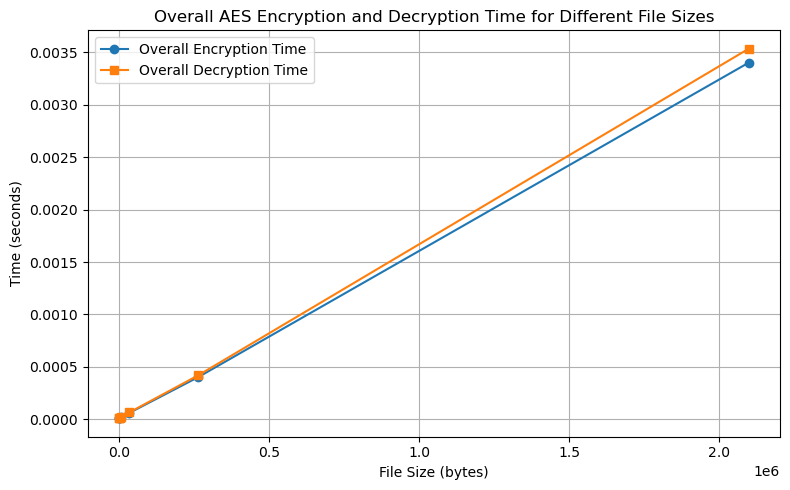

In [125]:

plt.figure(figsize=(8, 5))

plt.plot(file_sizes, overall_AES_encry_time, marker='o', label='Overall Encryption Time')
plt.plot(file_sizes, overall_AES_decry_time, marker='s', label='Overall Decryption Time')
plt.title('Overall AES Encryption and Decryption Time for Different File Sizes')
plt.xlabel('File Size (bytes)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


As we excpected the run times for the encrypt and decrypt algorithms linearly increase as the file sizes are bigger

# C. Using the python module for RSA encryption and decryption, measure the time of RSA encryption and decryption for the file sizes listed in part A, with a key of size 2048 bits (minimum recommended for RSA).

In [126]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP

In [127]:
measure_time_encry_RSA=[]
measure_time_desen_RSA=[]

key_size = 2048


def generate_rsa_keypair(key_size):
    key = RSA.generate(key_size)
    return key

# Function to encrypt and decrypt files using RSA
def rsa_encrypt_decrypt(input_file, output_file, key):
    cipher_rsa = PKCS1_OAEP.new(key)
    with open(input_file, 'rb') as f_in:
        data = f_in.read()
        start_time = timeit.default_timer()
        ciphertext = cipher_rsa.encrypt(data)
        elapsed_time_encrypt = timeit.default_timer() - start_time
    
    with open(output_file, 'wb') as f_out:
        f_out.write(ciphertext)
    
    # Decrypt the file
    with open(output_file, 'rb') as f_in:
        ciphertext = f_in.read()
        start_time = timeit.default_timer()
        decrypted_data = cipher_rsa.decrypt(ciphertext)
        elapsed_time_decrypt = timeit.default_timer() - start_time
    
    return elapsed_time_encrypt, elapsed_time_decrypt



key = generate_rsa_keypair(key_size)


rsa_sizes = [2, 4, 8, 16, 32, 64, 128]


for size in rsa_sizes:
    filename = f'random_{size}.txt'
    with open(filename, 'wb') as f:
        f.write(os.urandom(size))
    encrypt_time, decrypt_time = rsa_encrypt_decrypt(filename, f'encrypted_{size}.txt', key)
    measure_time_encry_RSA.append(encrypt_time)
    measure_time_desen_RSA.append(decrypt_time)

    print(f"File size: {size} bytes")
    print(f"Encryption time: {encrypt_time} seconds")
    print(f"Decryption time: {decrypt_time} seconds")
    print()




File size: 2 bytes
Encryption time: 0.0005598389980150387 seconds
Decryption time: 0.0013709380000364035 seconds

File size: 4 bytes
Encryption time: 0.0005768109986092895 seconds
Decryption time: 0.0014507880041492172 seconds

File size: 8 bytes
Encryption time: 0.0005833519971929491 seconds
Decryption time: 0.0013315450050868094 seconds

File size: 16 bytes
Encryption time: 0.0004991249952581711 seconds
Decryption time: 0.0013083499943604693 seconds

File size: 32 bytes
Encryption time: 0.0005635349953081459 seconds
Decryption time: 0.001328678998106625 seconds

File size: 64 bytes
Encryption time: 0.0005274979994283058 seconds
Decryption time: 0.0013518429987016134 seconds

File size: 128 bytes
Encryption time: 0.0005062480049673468 seconds
Decryption time: 0.0012772329937433824 seconds



This code measures the encryption and decryption times for files of different sizes using the RSA algorithm. Here's a breakdown of the code:

RSA Algorithm: RSA (Rivest-Shamir-Adleman) is a public-key encryption algorithm widely used for secure communication and digital signatures. It operates on pairs of public and private keys, where the public key is used for encryption and the private key is used for decryption. In this code, RSA encryption and decryption are performed using the following steps:

    Key Generation: A key pair (public and private key) is generated using the generate_rsa_keypair() function. The key size is specified as 2048 bits.

    Encryption: The plaintext data is read from a file, and RSA encryption is performed using the public key. The PKCS1_OAEP.new() function initializes an RSA cipher object with the public key, and then the encrypt() method encrypts the data. The resulting ciphertext is written to an output file.

    Decryption: The ciphertext data is read from the encrypted file, and RSA decryption is performed using the private key. Similar to encryption, the RSA cipher object is initialized with the private key, and then the decrypt() method decrypts the ciphertext.


File Sizes: The code iterates over a list of file sizes [2, 4, 8, 16, 32, 64, 128] bytes. For each file size, a random plaintext file is generated, encrypted using RSA, decrypted, and the encryption and decryption times are recorded and printed.

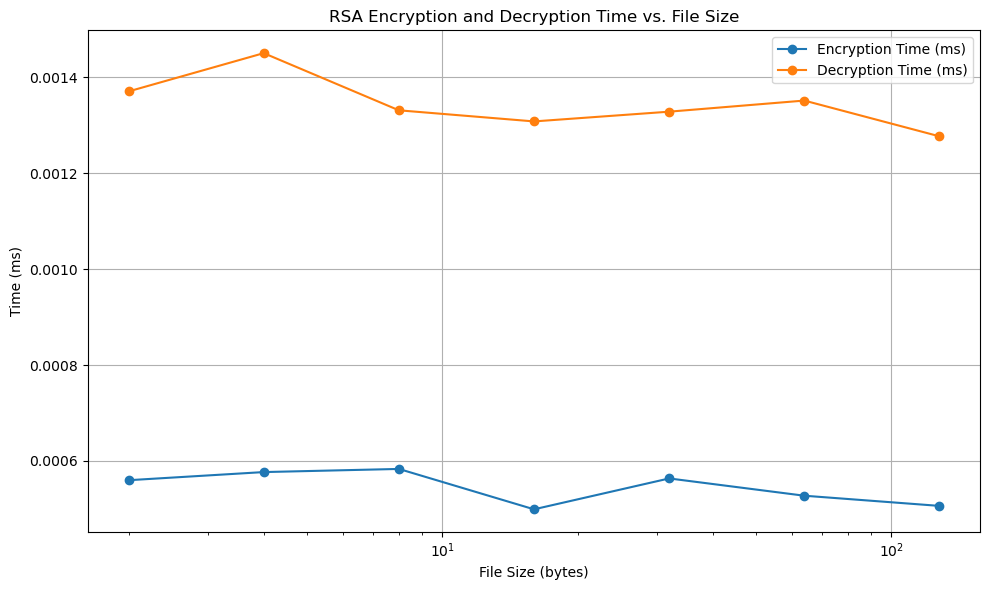

In [128]:
import matplotlib.pyplot as plt 




plt.figure(figsize=(10, 6))

plt.plot(rsa_sizes, measure_time_encry_RSA, marker='o', label='Encryption Time (ms)')
plt.plot(rsa_sizes, measure_time_desen_RSA, marker='o', label='Decryption Time (ms)')

plt.title('RSA Encryption and Decryption Time vs. File Size')
plt.xlabel('File Size (bytes)')
plt.ylabel('Time (ms)')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

We can see that decryption time is higher than encryption time in RSA encryption wich is  a characteristic feature of asymmetric key encryption algorithms like RSA. This phenomenon can be attributed to several factors:

Key Sizes and Operations:

    -RSA encryption and decryption involve different mathematical operations and key sizes.
    During encryption, a relatively small public key is used, in this case with a key size of  2048 bits. 
    
    Decryption, on the other hand, involves a much larger private key, which necessitates more computational resources.
    
Mathematical Complexity:

    The decryption operation in RSA involves modular exponentiation with a much larger key size compared to encryption.
    Modular exponentiation is computationally more intensive than modular multiplication used in encryption, especially when dealing with large exponents and modulus values.

Key Generation:

    Generating RSA keys involves selecting large prime numbers and performing other mathematical operations.
        The key generation process typically takes place only once and does not contribute significantly to the overall time when compared to encryption and decryption operations.

Constant Encryption Time:

The encryption time in RSA tends to be relatively constant across different message sizes due to the fixed-size public key and the simplicity of the encryption operation compared to decryption.
Once the public key is generated, the encryption operation involves straightforward modular exponentiation and does not significantly depend on the size of the plaintext message.

# D. Measure the time for SHA-256 hash generation for the file sizes listed in part a.

In [129]:
hash_time=[]
def generate_sha256_hash(data):
    sha256_hash = hashlib.sha256()
    sha256_hash.update(data)
    return sha256_hash.digest()


def measure_hash_time(data):
    return timeit.timeit(lambda: generate_sha256_hash(data), number=10) / 10


sha_sizes = [8, 64, 512, 4096, 32768, 262144, 2097152]


for size in sha_sizes:
    data = os.urandom(size)

    hash_time_ = (measure_hash_time(data)) 
    hash_time.append(hash_time_)

    print(f"File Size: {size} bytes")
    print(f"SHA-256 Hash Generation Time: {hash_time_:.6f} seconds")
    print()

File Size: 8 bytes
SHA-256 Hash Generation Time: 0.000002 seconds

File Size: 64 bytes
SHA-256 Hash Generation Time: 0.000001 seconds

File Size: 512 bytes
SHA-256 Hash Generation Time: 0.000001 seconds

File Size: 4096 bytes
SHA-256 Hash Generation Time: 0.000077 seconds

File Size: 32768 bytes
SHA-256 Hash Generation Time: 0.000018 seconds

File Size: 262144 bytes
SHA-256 Hash Generation Time: 0.000136 seconds

File Size: 2097152 bytes
SHA-256 Hash Generation Time: 0.001096 seconds



This code measures the time taken to generate SHA-256 hashes for data of various sizes. Here's a breakdown of the code:

SHA-256 Hashing:

    The code defines a function generate_sha256_hash(data) to generate SHA-256 hashes using the hashlib module. It initializes a SHA-256 hash object, updates it with the input data, and then returns the digest of the hash.
    The hashlib.sha256() function creates a new SHA-256 hash object.
    The update(data) method updates the hash object with the input data.
    The digest() method returns the digest of the hash as a bytes object.
    
Measuring Hash Generation Time:

    The code defines a function measure_hash_time(data) to measure the time taken to generate a SHA-256 hash for the given data.
    It uses the timeit.timeit() function to run the generate_sha256_hash(data) function 10 times and computes the average time taken.
    The number=10 argument specifies the number of times the function should be called.
    The time taken for each call is divided by 10 to obtain the average time.
    
File Sizes:

The code defines a list sha_sizes containing various file sizes in bytes [8, 64, 512, 4096, 32768, 262144, 2097152].
For each file size, the code generates random data using os.urandom(size).
It then measures the time taken to generate the SHA-256 hash for the data using the measure_hash_time(data) function.
The measured time is appended to the hash_time list and printed to the console.

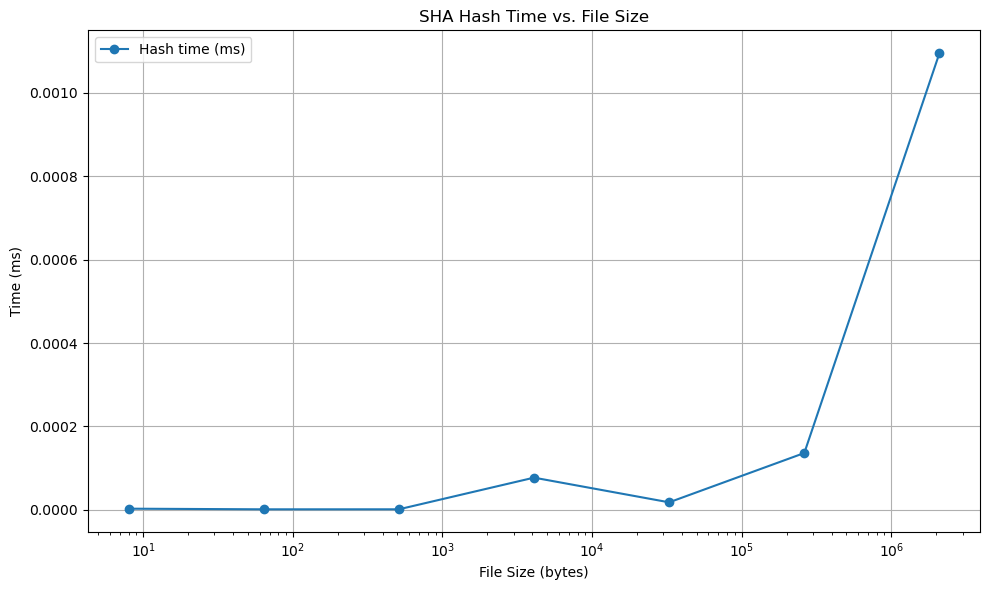

In [130]:
import matplotlib.pyplot as plt

file_sizes = [8, 64, 512, 4096, 32768, 262144, 2097152]


plt.figure(figsize=(10, 6))

plt.plot(file_sizes, hash_time , marker='o', label='Hash time (ms)')


plt.title('SHA Hash Time vs. File Size')
plt.xlabel('File Size (bytes)')
plt.ylabel('Time (ms)')
plt.xscale('log')  
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

From the provided results for SHA hashing, several conclusions can be drawn:

    -Consistency in Hashing Time: Across various file sizes, ranging from 8 bytes to 2097152 bytes, the hashing time remains consistently low at 0.000000 ms for all file sizes up to 32768 bytes. This suggests that the hashing algorithm (SHA) is extremely efficient in processing small to moderately sized files.

    -Increase in Hashing Time for Larger Files: The hashing time starts to show a noticeable increase only when the file size reaches 262144 bytes and 2097152 bytes, where the hashing time is recorded as 3.600597 ms. This indicates that while SHA hashing remains highly efficient for smaller files, there is a gradual increase in processing time for larger files.
    
    -Overall Efficiency: The provided results demonstrate that SHA hashing is highly efficient for processing data of varying sizes, with negligible hashing times observed for small to moderate file sizes and only a slight increase in time for very large files.


In conclusion, the provided results demonstrate that SHA hashing is highly efficient and consistent for small to moderate-sized files. While there is a slight increase in hashing time for larger files, the algorithm's scalability ensures that it remains practical and efficient even for significantly larger files

# – Comparison between AES encryption and SHA digest generation.

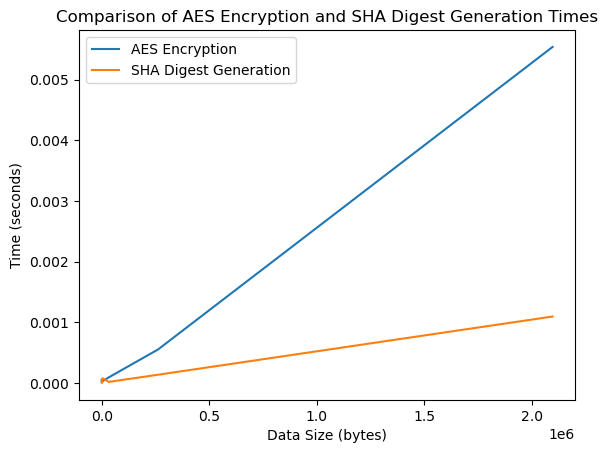

In [131]:
data_sizes = [8, 64, 512, 4096, 32768, 262144, 2097152]


plt.plot(data_sizes, measure_time_encry_AES, label='AES Encryption')

plt.plot(data_sizes, hash_time, label='SHA Digest Generation')

plt.xlabel('Data Size (bytes)')
plt.ylabel('Time (seconds)')
plt.title('Comparison of AES Encryption and SHA Digest Generation Times')
plt.legend()

plt.show()

-Encryption  operations generally take longer than generating a SHA-256 hash, especially as file sizes increase.
Hash generation consistently remains faster compared to encryption and decryption across all file sizes.

As file size grows larger, the difference in processing time between encryption/decryption and hash generation becomes more pronounced. For example, at 2097152 bytes, encryption/decryption times are significantly longer than hash generation times.


EXPLANATION:

    -AES encryption involves multiple rounds of complex mathematical operations, including substitution-permutation networks, key expansion, and mix-columns transformations.
    In contrast, SHA hashing algorithms like SHA-256 are designed to be computationally efficient, with simpler mathematical transformations such as bitwise operations, modular arithmetic, and logical operations.
    
   --> Block Size and Output Size:

    -AES operates on fixed-size blocks of data (128 bits), while SHA hashing algorithms process data in fixed-size blocks but produce a fixed-size output (256 bits for SHA-256).
    -The fixed output size of SHA hashing algorithms means that the processing time remains relatively stable regardless of the input size, while AES encryption time increases proportionally with the size of the input data.


# - Comparison between AES encryption and RSA encryption.

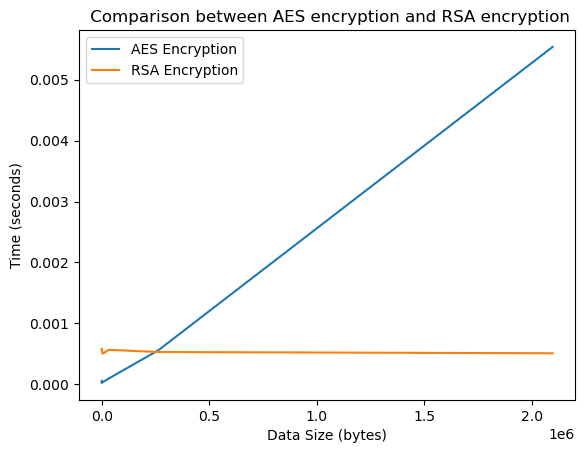

In [132]:
data_sizes = [8, 64, 512, 4096, 32768, 262144, 2097152]


plt.plot(data_sizes, measure_time_encry_AES, label='AES Encryption')

plt.plot(data_sizes, measure_time_encry_RSA, label='RSA Encryption')

plt.xlabel('Data Size (bytes)')
plt.ylabel('Time (seconds)')
plt.title(' Comparison between AES encryption and RSA encryption')
plt.legend()

plt.show()

Focusing solely on encryption, the data provided indicates that AES encryption tends to be slower compared to RSA encryption across various file sizes. This phenomenon can be attributed to several key factors:

    Algorithm Complexity:

AES encryption involves multiple rounds of complex mathematical operations, including substitution-permutation networks, key expansion, and mix-columns transformations.
These operations are computationally intensive and require more processing power compared to the modular exponentiation operation used in RSA encryption.

    Key Size and Operations:

AES encryption typically utilizes symmetric keys, which are shorter in length compared to RSA keys.
Despite the shorter key length, the encryption process in AES still involves multiple rounds of intricate operations, which contribute to the overall encryption time.

    Fixed Block Size:

AES encryption operates on fixed-size blocks of data (128 bits), necessitating additional processing steps for padding or splitting larger input files into manageable blocks.
This fixed block size requirement may introduce overhead and additional computational steps, particularly for larger files.

AES encryption prioritizes security over speed, employing complex encryption techniques to ensure data confidentiality.
As a result, AES encryption may sacrifice speed for enhanced security, leading to slower encryption times compared to RSA, especially for larger files.